In [13]:
## Importing the dataset
import pandas as pd
iris = pd.read_csv(r"C:\Users\Admin\Downloads\intern\IRIS.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# VISUALIZATION

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

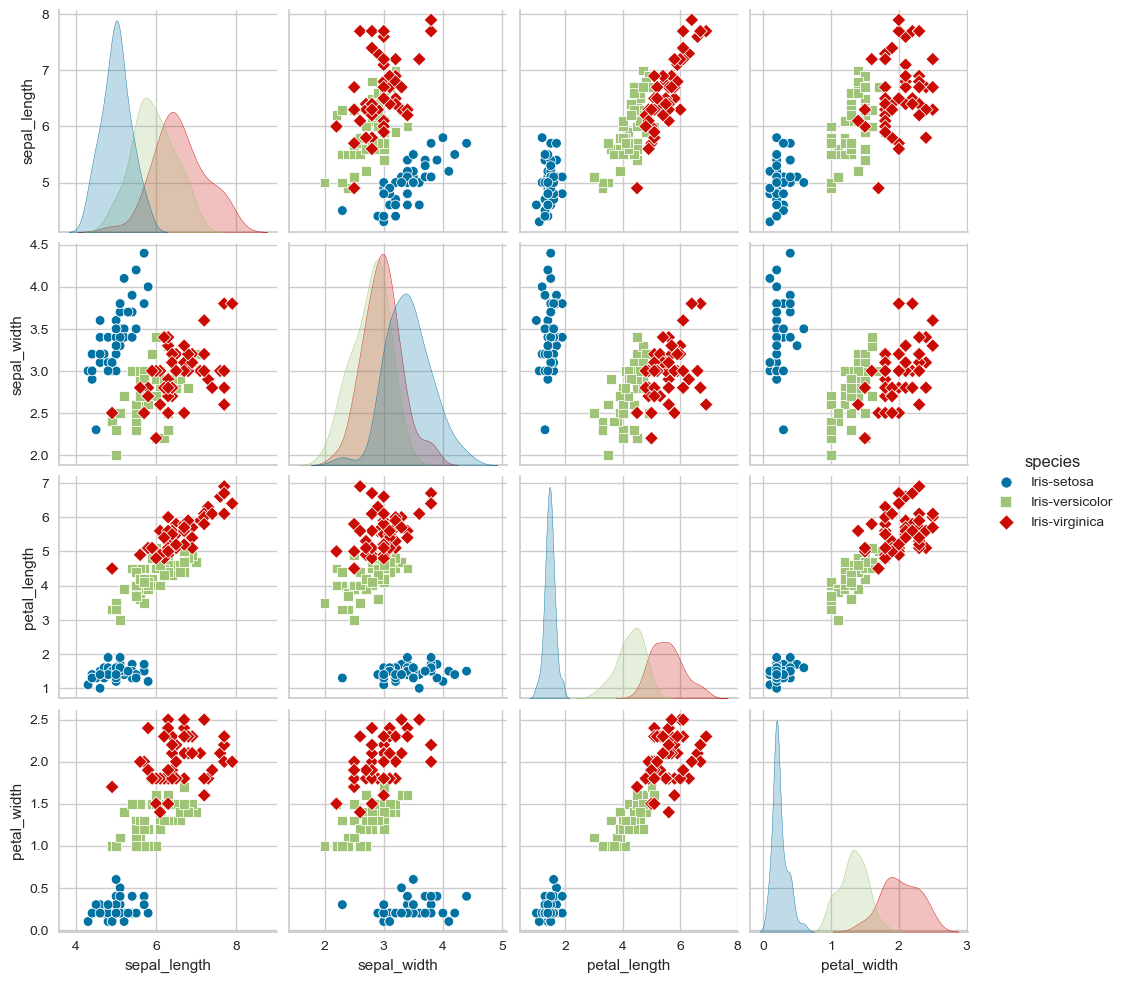

In [14]:
# Visualizing the data
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(iris, hue='species', markers=["o", "s", "D"])
plt.show()

# EDA

In [15]:
## Preparing the scaled dataframe
from sklearn.preprocessing import LabelEncoder,StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()
iris["species"] = encoder.fit_transform(iris["species"])
data = iris.drop(columns=["species"])
scaled_data = pd.DataFrame(scaler.fit_transform(data))
scaled_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
scaled_data["species"] = iris["species"]
scaled_data


,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,2
146,0.553333,-1.281972,0.705893,0.922064,2
147,0.795669,-0.124958,0.819624,1.053537,2
148,0.432165,0.800654,0.933356,1.447956,2


In [16]:
## Preparing train and test data from scaled dataframe
from sklearn.model_selection import train_test_split
x = scaled_data.iloc[:,:-1]
y = scaled_data.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state =42)

# BUILDING MODEL

In [17]:
## Building the SVC Model and evaluating the classfication metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix
model1 = SVC()
model1.fit(x_train, y_train)

SVC()

In [18]:
## Checking training accuracy 
y_pred_train = model1.predict(x_train)
print("The Accuracy of the model is",accuracy_score(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))

The Accuracy of the model is 0.975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.93      0.96        41
           2       0.93      1.00      0.96        39

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.97       120
weighted avg       0.98      0.97      0.97       120



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.975

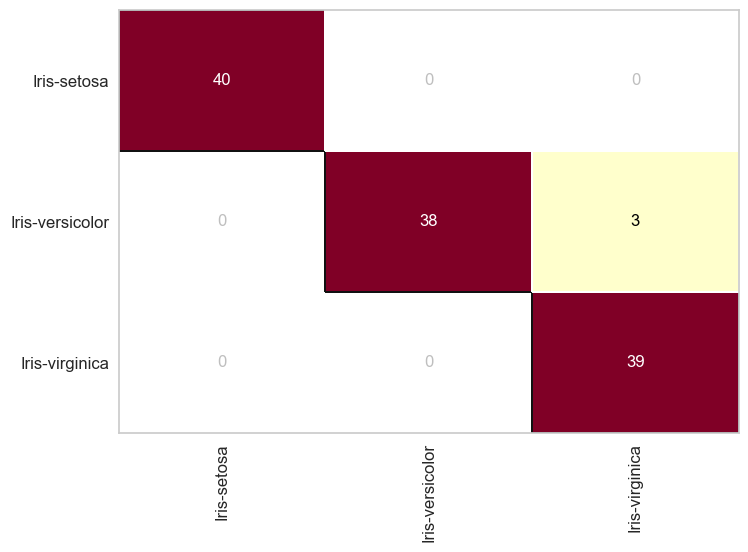

In [19]:
## Visualizing the confusion matrix 
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model1,classes=["Iris-setosa","Iris-versicolor","Iris-virginica"])
cm.fit(x_train,y_train)
cm.score(x_train,y_train)

In [20]:
## Checking the test accuracy 
y_pred_test = model1.predict(x_test)
print("The Accuracy of the model is",accuracy_score(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

The Accuracy of the model is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


1.0

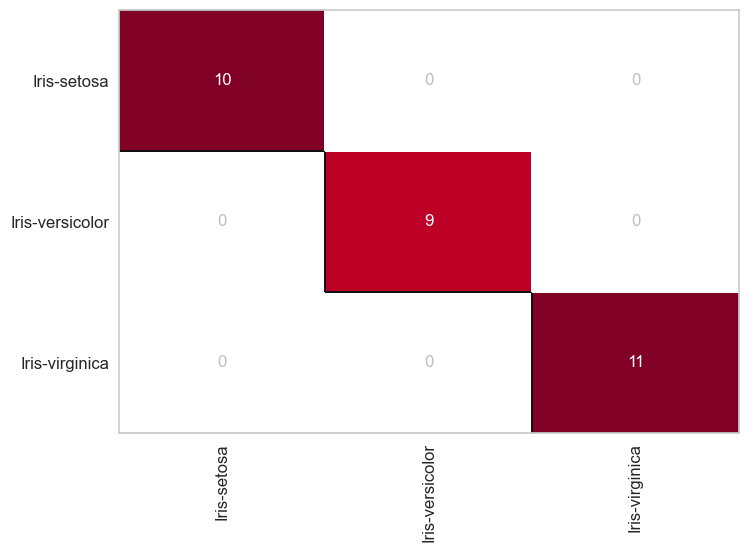

In [21]:
## Visualizing the confusion matrix 
from yellowbrick.classifier import ConfusionMatrix
cm1 = ConfusionMatrix(model1,classes=["Iris-setosa","Iris-versicolor","Iris-virginica"])
cm1.fit(x_test,y_test)
cm1.score(x_test,y_test)